
#Laboratorio 5: SymPy


Grupo 31
* Javier Alejandro Ortiz Silva.
* Gustavo Alberto Puentes Romero
* Cristian Daniel Ramirez Marin



Nota: Las celdas adicionadas se encuentran al final

# SymPyLab

SymPy’s documentation
- https://docs.sympy.org/latest/index.html


## SymPy’s polynomials 
- https://docs.sympy.org/latest/modules/polys/basics.html#polynomials 

- (x-1)(x-2)(x-3)(x-4)(x-5) = x^5 - 15 x^4  + 85 x^3 - 225 x^2 + 274 x - 120

- (x^5 - 15 x^4  + 85 x^3 - 225 x^2 + 274 x - 120) / (x-1) = x^4  - 14 x^3  + 71 x^2  - 154 x + 120

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram1.jpg" /> <img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram3.jpg" />


In [1]:
from sympy import Symbol
from sympy import div

x = Symbol('x')

p = x**5 - 15*x**4  + 85*x**3 - 225*x**2 + 274*x - 120

p, r = div(p,  x-1)

print(p)
print(r)

p, r = div(p,  x-2)

print(p)
print(r)

p, r = div(p,  x-3)

print(p)
print(r)

p, r = div(p,  x-4)

print(p)
print(r)



x**4 - 14*x**3 + 71*x**2 - 154*x + 120
0
x**3 - 12*x**2 + 47*x - 60
0
x**2 - 9*x + 20
0
x - 5
0


## SymPy’s polynomial simple univariate polynomial factorization
- https://docs.sympy.org/latest/modules/polys/wester.html#simple-univariate-polynomial-factorization
- factor(x\*\*5 - 15\*x\*\*4  + 85\*x\*\*3 - 225\*x\*\*2 + 274\*x - 120)

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram4.jpg" />


In [2]:
from sympy import *
x = Symbol('x')
factor(x**5 - 15*x**4  + 85*x**3 - 225*x**2 + 274*x - 120)

(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)

## SymPy’s solvers
- https://docs.sympy.org/latest/tutorial/solvers.html
- x\*\*5 - 15\*x\*\*4  + 85\*x\*\* 3 - 225\*x\*\* 2 + 274\*x - 120 = 0

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram5.jpg" />

In [3]:
from sympy import *
x = Symbol('x')
solveset(Eq(x**5 - 15*x**4  + 85*x**3 - 225*x**2 + 274*x - 120, 0), x)


FiniteSet(1, 2, 3, 4, 5)

## SymPy’s Symbolic and Numercical Complex Evaluations
- https://docs.sympy.org/latest/modules/evalf.html](https://)
- x = x1 + I*x2,y = y1 + I*y2, z = z1 + I*z2, x*y*z

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram7.jpg" />

In [4]:
from sympy import *
x1, x2, y1, y2, z1, z2 = symbols("x1 x2 y1 y2 z1 z2", real=True)  
x = x1 + I*x2
y = y1 + I*y2
z = z1 + I*z2

print(x*y*z)
print(expand(x*y*z))
print(expand((x*y)*z))
print(expand(x*(y*z)))

w=N(1/(pi + I), 20)
print('w=',w)

(x1 + I*x2)*(y1 + I*y2)*(z1 + I*z2)
x1*y1*z1 + I*x1*y1*z2 + I*x1*y2*z1 - x1*y2*z2 + I*x2*y1*z1 - x2*y1*z2 - x2*y2*z1 - I*x2*y2*z2
x1*y1*z1 + I*x1*y1*z2 + I*x1*y2*z1 - x1*y2*z2 + I*x2*y1*z1 - x2*y1*z2 - x2*y2*z1 - I*x2*y2*z2
x1*y1*z1 + I*x1*y1*z2 + I*x1*y2*z1 - x1*y2*z2 + I*x2*y1*z1 - x2*y1*z2 - x2*y2*z1 - I*x2*y2*z2
w= 0.28902548222223624241 - 0.091999668350375232456*I


## SymPy’s integrals
- https://docs.sympy.org/latest/modules/integrals/integrals.html
- [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html)



Let’s start with a simple integration problem in 1D,

$$\int_1^5 x^2 dx$$
 
This is easy to solve analytically, and we can use the SymPy library in case you’ve forgotten how to resolve simple integrals.

In [5]:
import sympy
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(x**2)
print(i)
result["analytical"] = float(i.subs(x, 5) - i.subs(x, 1))
print("Analytical result: {}".format(result["analytical"]))

x**3/3
Analytical result: 41.333333333333336


**Integrating with Monte Carlo** 
[risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 

We can estimate this integral using a standard Monte Carlo method, where we use the fact that the expectation of a random variable is related to its integral

$$\mathbb{E}(f(x)) = \int_I f(x) dx $$

We will sample a large number N of points in I and calculate their average, and multiply by the range over which we are integrating.

In [6]:
import numpy
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 41.3225569324424


- integrate(x\*\*2 * sin(x)\*\*3)

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram8.jpg" />

In [7]:
import sympy
x = Symbol("x")
i = integrate(x**2 * sin(x)**3)
print(i)
print(float(i.subs(x, 5) - i.subs(x, 1)))

-x**2*sin(x)**2*cos(x) - 2*x**2*cos(x)**3/3 + 14*x*sin(x)**3/9 + 4*x*sin(x)*cos(x)**2/3 + 14*sin(x)**2*cos(x)/9 + 40*cos(x)**3/27
-15.42978215330555


In [8]:
import numpy
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2 * sin(x)**3
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: -15.3666534150031


**A higher dimensional integral** [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 


Let us now analyze an integration problem in dimension 4, the Ishigami function. This is a well-known function in numerical optimization and stochastic analysis, because it is very highly non-linear.

In [9]:
import sympy

x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.sin(x1) + 7*sympy.sin(x2)**2 + 0.1 * x3**4 * sympy.sin(x1)
res = sympy.integrate(expr,
                      (x1, -sympy.pi, sympy.pi),
                      (x2, -sympy.pi, sympy.pi),
                      (x3, -sympy.pi, sympy.pi))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 868.175747048395


In [10]:
N = 10_000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx2 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx3 = numpy.random.uniform(-numpy.pi, numpy.pi)
    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 879.955902484794


In [11]:
import math
import numpy
# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

<ipython-input-12-d6f4cd360f7e>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


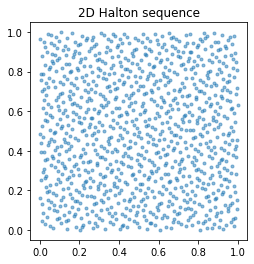

In [12]:
import matplotlib.pyplot as plt
N = 1000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);

In [13]:
"""N = 10_000

seq = halton(3, N)
accum = 0
for i in range(N):
    xx1 = -numpy.pi + seq[i][0] * numpy.pi * 2
    xx2 = -numpy.pi + seq[i][1] * numpy.pi * 2
    xx3 = -numpy.pi + seq[i][2] * numpy.pi * 2
    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Qausi Monte Carlo Halton Sequence result: {}".format(result["MC"]))"""

'N = 10_000\n\nseq = halton(3, N)\naccum = 0\nfor i in range(N):\n    xx1 = -numpy.pi + seq[i][0] * numpy.pi * 2\n    xx2 = -numpy.pi + seq[i][1] * numpy.pi * 2\n    xx3 = -numpy.pi + seq[i][2] * numpy.pi * 2\n    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)\nvolume = (2 * numpy.pi)**3\nresult = {} \nresult["MC"] = volume * accum / float(N)\nprint("Qausi Monte Carlo Halton Sequence result: {}".format(result["MC"]))'

## Wolfram alpha answers quastion in natural languaje
- What is the average temperature in Bogota in September?

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram6.jpg" />

# **||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**

# **||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||**

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Solucion Laboratorio 5 punto 1



1. Modify the code of SymPyLab from github to add cells and images from Wolfram Alpha for the polynomial (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9)(x-10) and integrals of one dimensional an three dimensional functions that are product of a polynomial, log, sin, and e^. and the other cells create you own examples.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Parte 1: Polinomios en SymPy

Ingresamos el polinomio (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9)(x-10) en WolframAlpha

<img src="https://raw.githubusercontent.com/jortizsi/SymPyLab/main/1ero.jpg"/>

Usando la fucion factor ingresamos la forma extendida del polinomio para que nos genere la forma completamente factorizada

In [14]:
from sympy import *

x = Symbol('x')
factor(x**10 - 55*x**9  + 1320*x**8 - 18150*x**7 + 157773*x**6 - 902055*x**5+ 3416930*x**4 - 8409500*x**3 + 12753576*x**2 - 10628640*x + 3628800 )

(x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)

Ahora usaremos la division de polinomios mediante la fucion div. Dividiremos el polinomio en su forma expandida por cada uno de sus terminos, excepto el ultimo, de la forma factorizada. El resultado sera el termino faltante (X-10). Tambien notese que con cada division el polinomio ve su grado reducido en 1.

In [15]:
from sympy import Symbol
from sympy import div

x = Symbol('x')
print("------------------------")
print("Division sintetica")
print("------------------------\n\n\n")



print("Polinomio en forma expandida grado 10:")
print("      x**10 - 55*x**9  + 1320*x**8 - 18150*x**7 + 157773*x**6 - 902055*x**5+ 3416930*x**4 - 8409500*x**3 + 12753576*x**2 - 10628640*x + 3628800\n\n\n")


print("division por (x - 1):")
p = x**10 - 55*x**9  + 1320*x**8 - 18150*x**7 + 157773*x**6 - 902055*x**5+ 3416930*x**4 - 8409500*x**3 + 12753576*x**2 - 10628640*x + 3628800 

p, r = div(p,  x-1)

print(p)
print(r)


print("\n\n\ndivision por (x - 2):")
p, r = div(p,  x-2)

print(p)
print(r)


print("\n\n\ndivision por (x - 3):")
p, r = div(p,  x-3)

print(p)
print(r)


print("\n\n\ndivision por (x - 4):")
p, r = div(p,  x-4)

print(p)
print(r)


print("\n\n\ndivision por (x - 5):")
p, r = div(p,  x-5)

print(p)
print(r)


print("\n\n\ndivision por (x - 6):")
p, r = div(p,  x-6)

print(p)
print(r)


print("\n\n\ndivision por (x - 7):")
p, r = div(p,  x-7)

print(p)
print(r)



print("\n\n\ndivision por (x - 8):")
p, r = div(p,  x-8)

print(p)
print(r)


print("\n\n\ndivision por (x - 9):")
p, r = div(p,  x-9)

print(p)
print(r)

------------------------
Division sintetica
------------------------



Polinomio en forma expandida grado 10:
      x**10 - 55*x**9  + 1320*x**8 - 18150*x**7 + 157773*x**6 - 902055*x**5+ 3416930*x**4 - 8409500*x**3 + 12753576*x**2 - 10628640*x + 3628800



division por (x - 1):
x**9 - 54*x**8 + 1266*x**7 - 16884*x**6 + 140889*x**5 - 761166*x**4 + 2655764*x**3 - 5753736*x**2 + 6999840*x - 3628800
0



division por (x - 2):
x**8 - 52*x**7 + 1162*x**6 - 14560*x**5 + 111769*x**4 - 537628*x**3 + 1580508*x**2 - 2592720*x + 1814400
0



division por (x - 3):
x**7 - 49*x**6 + 1015*x**5 - 11515*x**4 + 77224*x**3 - 305956*x**2 + 662640*x - 604800
0



division por (x - 4):
x**6 - 45*x**5 + 835*x**4 - 8175*x**3 + 44524*x**2 - 127860*x + 151200
0



division por (x - 5):


x**5 - 40*x**4 + 635*x**3 - 5000*x**2 + 19524*x - 30240
0



division por (x - 6):
x**4 - 34*x**3 + 431*x**2 - 2414*x + 5040
0



division por (x - 7):
x**3 - 27*x**2 + 242*x - 720
0



division por (x - 8):
x**2 - 19*x + 90
0



division por (x - 9):
x - 10
0


**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

#Parte 2: Integrales en SymPy

##A Integrales simples en una variable

**Ejemplo 1**



Integral de una funcion producto de polinomio, seno y exponencial.

$$\int_{-5}^5 x^2sin(x)e^x dx$$


<img src="https://raw.githubusercontent.com/jortizsi/SymPyLab/main/Integral1.png"/>

##Solucion analitica usando el teorema fundamental del calculo

In [16]:
import sympy
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(x**2*sympy.sin(x) * sympy.exp(x))
print("Antiderivada o integral indefinida\n      ",i,"\n\n\n")

print("Solucion analitica F(b) - F(a) donde F es la antiderivada, b limite superior y a limite inferior")

result["analytical"] = float(i.subs(x, 5) - i.subs(x, -5))

print("    ",result["analytical"])

Antiderivada o integral indefinida
       x**2*exp(x)*sin(x)/2 - x**2*exp(x)*cos(x)/2 + x*exp(x)*cos(x) - exp(x)*sin(x)/2 - exp(x)*cos(x)/2 



Solucion analitica F(b) - F(a) donde F es la antiderivada, b limite superior y a limite inferior
     -2044.6405105725285


##Estimacion por metodo de montecarlo

In [17]:
import numpy
N = 100_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(-5, 5)
    accum += x**2*sympy.sin(x) * sympy.exp(x)
volume = 5- (-5)
result["MC"] = volume * accum / float(N)
print("Estimacion por metodo estandar de MonteCarlo: {}".format(result["MC"]))

Estimacion por metodo estandar de MonteCarlo: -2074.80085674130


**Ejemplo 2**



Integral de una funcion producto de polinomio y logaritmo.
$$\int_{1}^5-x^4log_{2}{(x)} dx$$ 


<img src="https://raw.githubusercontent.com/jortizsi/SymPyLab/main/Integral2Log.png"/>

##Solucion analitica usando el teorema fundamental del calculo

In [18]:
import sympy
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(-(x**4)*sympy.log(x,2))

print("Antiderivada o integral indefinida\n      ",i,"\n\n\n")

print("Solucion analitica F(b) - F(a) donde F es la antiderivada, b limite superior y a limite inferior")

result["analytical"] = float(i.subs(x, 5) - i.subs(x, 1))

print("    ",result["analytical"])

Antiderivada o integral indefinida
       -x**5*log(x)/(5*log(2)) + x**5/(25*log(2)) 



Solucion analitica F(b) - F(a) donde F es la antiderivada, b limite superior y a limite inferior
     -1270.9258869951166


##Estimacion por metodo de montecarlo

In [19]:
import numpy
N = 100_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += -(x**4)*float(sympy.log(x,2))
volume = 5- 1
result["MC"] = volume * accum / float(N)
print("Estimacion por metodo estandar de MonteCarlo: {}".format(result["MC"]))

Estimacion por metodo estandar de MonteCarlo: -1275.92074369459


##B. Integrales triples para funciones de 3 variables

**Ejemplo 1**



Integral triple de una funcion producto de seno, polinomio, exponencial y logaritmo natural
$$\int_{0}^2 \int_{0}^2 \int_{0}^2 sen(x)y^3e^{z}ln(y) dx dy dz$$ 


<img src="https://raw.githubusercontent.com/jortizsi/SymPyLab/main/funcion3variables1.png"/>

##Solucion analitica usando el metodo integrate de SymPy

In [20]:
import sympy
sympy.init_printing()

x = sympy.Symbol("x")
y = sympy.Symbol("y")
z = sympy.Symbol("z")
expr =   sympy.sin(x)*y**3*sympy.exp(z)*sympy.ln(y)

res = sympy.integrate(expr,
                      (x, 0,2),
                      (y, 0,2),
                      (z, 0,2))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Solucion analitica: {}".format(result["analytical"]))

Solucion analitica: 16.038101950678463


##Estimacion por metodo de montecarlo

In [21]:
import numpy
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(0,2)
    y = numpy.random.uniform(0,2)
    z = numpy.random.uniform(0,2)
    accum += numpy.sin(x)*y**3*numpy.exp(z)*numpy.log(y)
volume = 8
result = {} 
result["MC"] = volume * accum / float(N)
print("Estimacion por metodo estandar de MonteCarlo: {}".format(result["MC"]))

Estimacion por metodo estandar de MonteCarlo: 16.11611503905742


**Ejemplo 2**



Integral triple de una funcion producto de polinomio, seno cuadrado, exponencial negativo y logaritmo base dos
$$\int_{0}^2 \int_{0}^2 \int_{0}^2 sen(x)y^3e^{z}ln(y) dx dy dz$$ 


<img src="https://raw.githubusercontent.com/jortizsi/SymPyLab/main/funcion3variables2.png"/>

##Solucion analitica usando el metodo integrate de SymPy

In [22]:
import sympy
sympy.init_printing()

x = sympy.Symbol("x")
y = sympy.Symbol("y")
z = sympy.Symbol("z")
expr =   (x**2)*((sympy.sin(y))**2)*sympy.exp(-z)*sympy.log(x,2)
res = sympy.integrate(expr,
                      (x, 0,5),
                      (y, -1,4),
                      (z, -3,2))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Solucion analitica: {}".format(result["analytical"]))

Solucion analitica: 3099.5165072370155


##Estimacion por metodo de montecarlo

In [1]:
import numpy

N = 10_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(0,5)
    y = numpy.random.uniform(-1,4)
    z = numpy.random.uniform(-3,2)
    accum += (x**2)*((numpy.sin(y))**2)*numpy.exp(-z)*numpy.math.log2(x)
volume = 125
result = {} 
result["MC"] = volume * accum / float(N)
print("Estimacion por metodo estandar de MonteCarlo: {}".format(result["MC"]))